![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [24]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [25]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


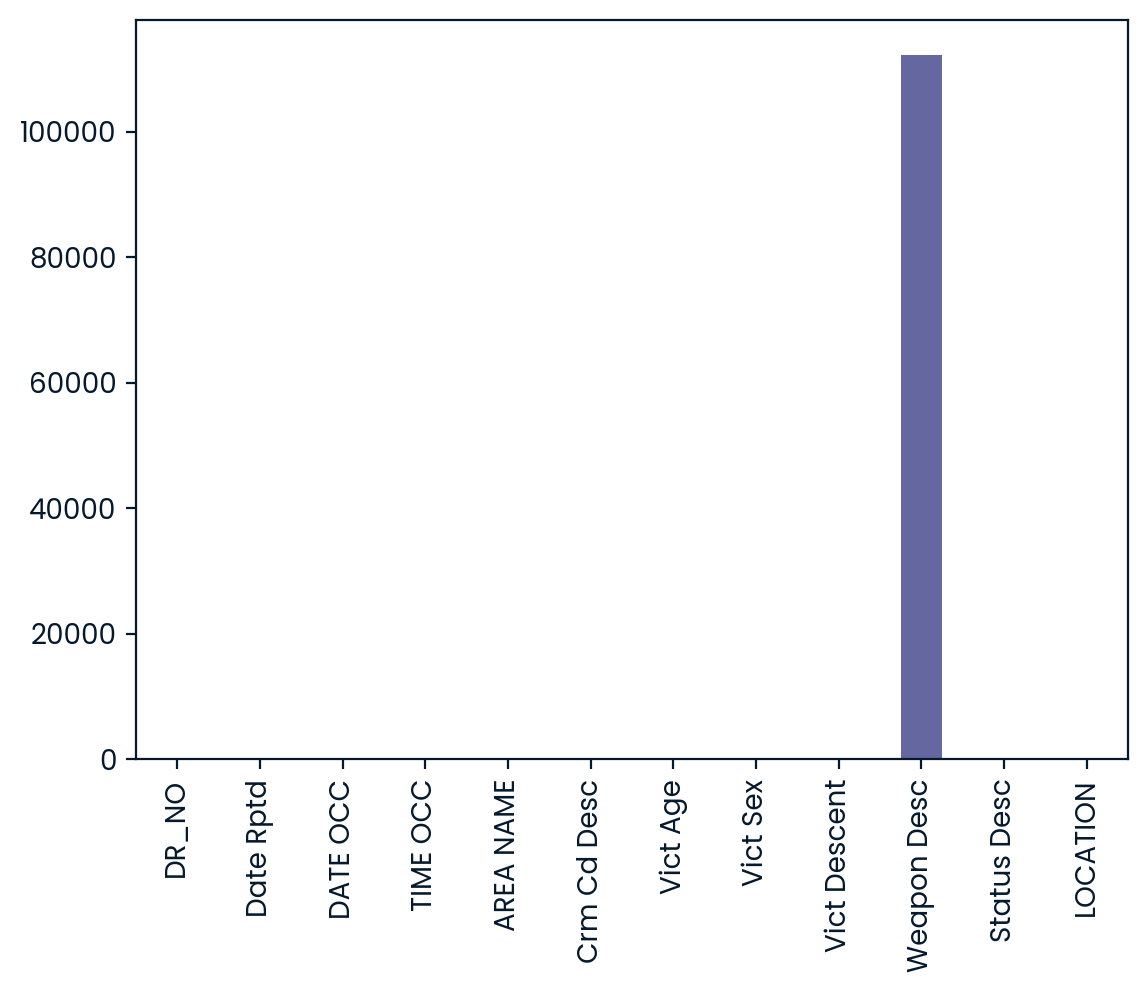

In [26]:
crimes.isna().sum().plot(kind="bar")
plt.show()

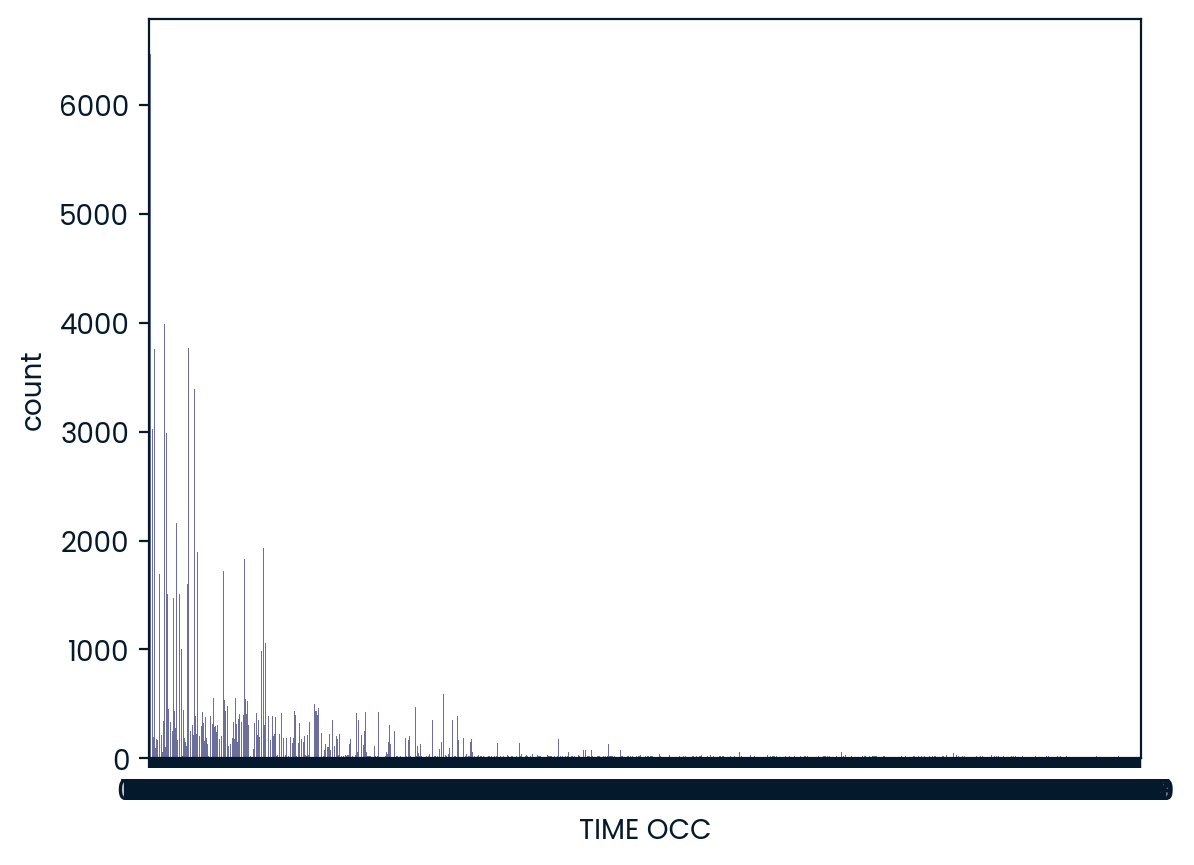

In [27]:
sns.countplot(x="TIME OCC", data=crimes)
plt.show()

In [28]:
crimes['TIME OCC'].dtypes

dtype('O')

In [29]:
# Convert 'TIME OCC' to datetime objects, handling errors
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format = '%H%M', errors = 'coerce').dt.time

# Extract the hour from the 'TIME OCC' column
crimes['By Hour'] = pd.to_datetime(crimes['TIME OCC'], format = '%H:%M:%S').dt.hour
print(crimes['By Hour'])

0         11
1         16
2         12
3          6
4          9
          ..
185710    11
185711    18
185712    10
185713    16
185714     9
Name: By Hour, Length: 185715, dtype: int64


In [30]:
peak_crime_hour = crimes['By Hour'].value_counts().idxmax()
print(f"The most common crime hour is {peak_crime_hour}.")

The most common crime hour is 12.


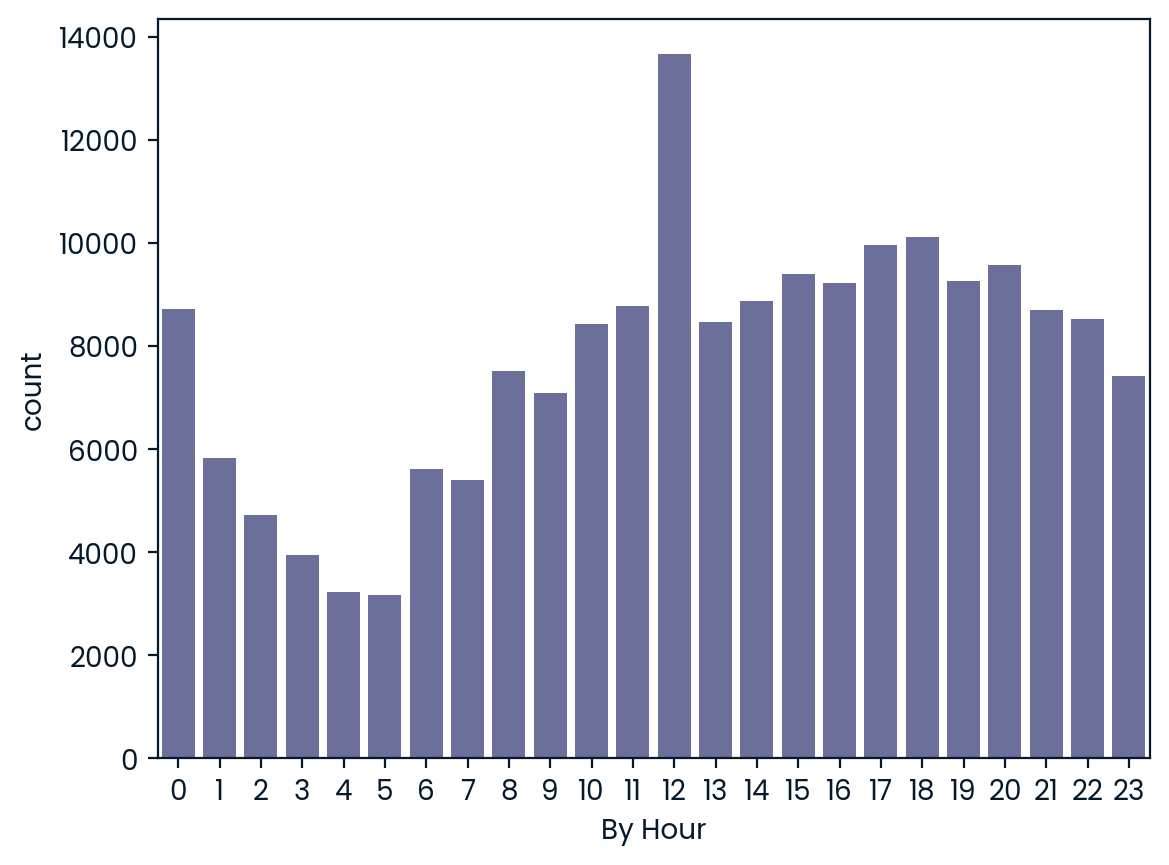

In [31]:
sns.countplot(x="By Hour", data=crimes)
plt.show()

In [32]:
crimes_between_10_and_16 = crimes[(crimes['By Hour'] >=10) & (crimes['By Hour'] <=15)
                 & (pd.to_datetime(crimes['TIME OCC'], format='%H:%M:%S').dt.minute <60)]


In [33]:
filtered_crimes_by_area = crimes_between_10_and_16.groupby('AREA NAME')['Crm Cd Desc']\
          .count().sort_values(ascending=False)
print(filtered_crimes_by_area)

AREA NAME
Central        4306
Southwest      3769
77th Street    3574
Pacific        3149
Southeast      2837
Van Nuys       2835
Topanga        2830
Hollywood      2817
Olympic        2779
Wilshire       2712
West LA        2691
Newton         2666
N Hollywood    2637
Rampart        2589
West Valley    2566
Devonshire     2447
Northeast      2322
Mission        2139
Harbor         2110
Hollenbeck     1931
Foothill       1923
Name: Crm Cd Desc, dtype: int64


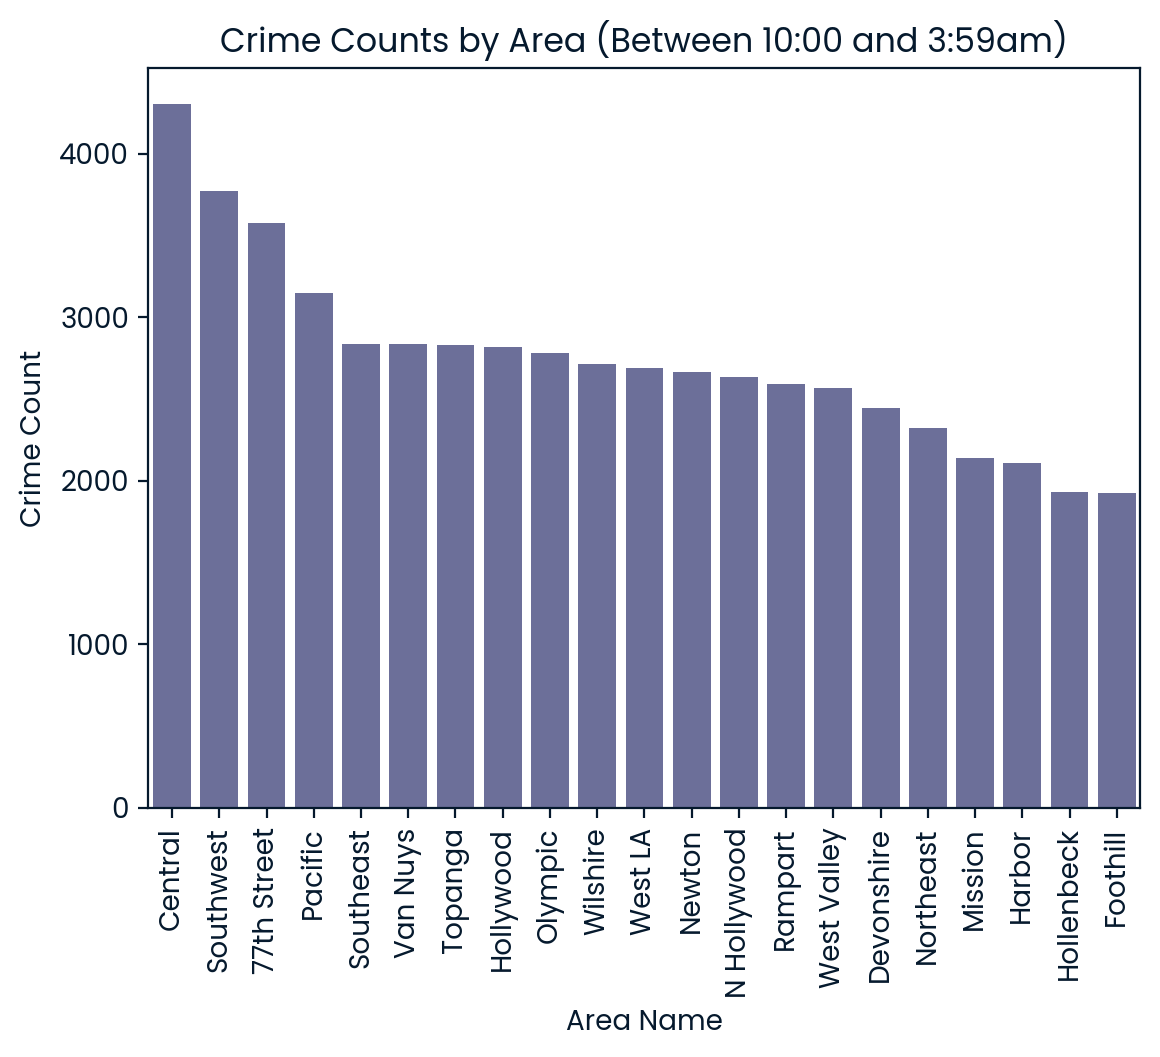

In [34]:
sns.barplot(x=filtered_crimes_by_area.index, y=filtered_crimes_by_area.values)
plt.xticks(rotation=90)
plt.title('Crime Counts by Area (Between 10:00 and 3:59am)')
plt.xlabel('Area Name')
plt.ylabel('Crime Count')
plt.show()

In [35]:
peak_night_crime_location = filtered_crimes_by_area.idxmax()
print(peak_night_crime_location)

Central


In [36]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION', 'By Hour'],
      dtype='object')

In [37]:
crimes['Vict Age'] = pd.to_numeric(crimes['Vict Age'], errors='coerce')

numerical_age = [-float('inf'), 17, 25, 34, 44, 54, 64, float('inf')]
age_group = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

crimes['Victim Age Group'] = pd.cut(crimes['Vict Age'], 
                                    bins=numerical_age, 
                                    labels=age_group, 
                                    right=True)

In [38]:
print(crimes['Victim Age Group'].value_counts())

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Victim Age Group, dtype: int64


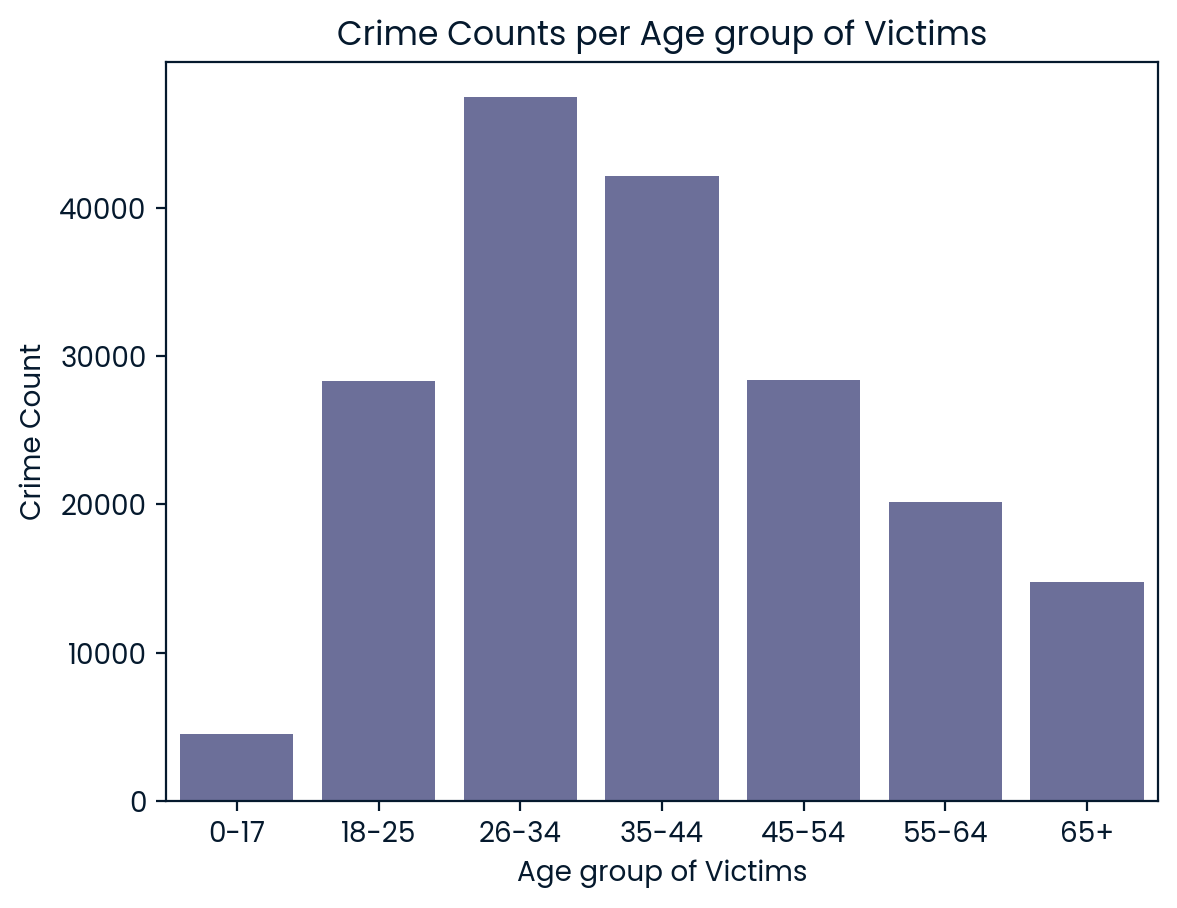

In [39]:
sns.countplot(x='Victim Age Group', data=crimes)
plt.title('Crime Counts per Age group of Victims')
plt.xlabel('Age group of Victims')
plt.ylabel('Crime Count')
plt.show()

In [40]:
victim_ages = crimes['Victim Age Group'].value_counts()
print(victim_ages)

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Victim Age Group, dtype: int64


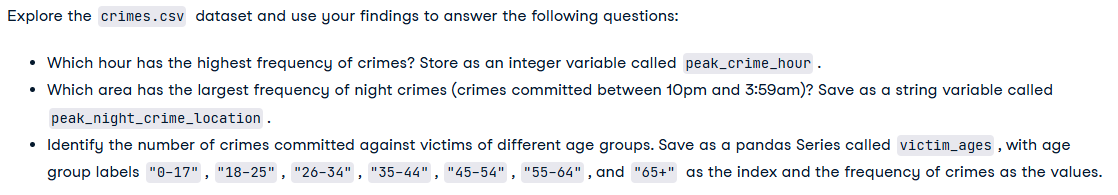